# DSC 540-Week 5 & 6 Exercises
# Kannur, Gyan

## Data Wrangling with Python: Activity 7

## create a soup with bs4 and load the data 

In [35]:
## loading the required packages
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [4]:
## Reading the html file
fd = open('./datasets/countries_gdp.htm', 'r', encoding="utf-8")
soup = BeautifulSoup(fd)
fd.close()

In [7]:
## Number of tables that I will deal with
all_tables = soup.find_all('table')
count=len(all_tables)
print("Total number of tables are {} ".format(count))

Total number of tables are 9 


In [8]:
## Using the class attribute to find the right table
data_table = soup.find("table", {"class": '"wikitable"|}'})
dp=type(data_table) ## this prints data type of the returned object
print("data type of the returned object : {} ".format(dp))

data type of the returned object : <class 'bs4.element.Tag'> 


In [9]:
## Separatng the source names and their corresponding data
sources = data_table.tbody.findAll('tr', recursive=False)[0]
sources_list = [td for td in sources.findAll('td')]
print(len(sources_list))
### This shows data is from three sources

3


In [10]:
data = data_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)
type(data) ## type of the actual data

bs4.element.ResultSet

In [11]:
## Get the source names from the list of sources you have created
data_tables = []
for td in data:
    data_tables.append(td.findAll('table'))

In [12]:
len(data_tables)

3

In [25]:
## Separating the header and data from the data for the first source only

In [13]:
# extracting source names with the help of getText() by passing the values from sources_list in a loop
source_names = [source.findAll('a')[0].getText() for source in sources_list]
print(source_names)

['International Monetary Fund', 'World Bank', 'United Nations']


In [15]:
## Extracting the column headers for the data
header1 = [th.getText().strip() for th in data_tables[0][0].findAll('thead')[0].findAll('th')]
header1

['Rank', 'Country', 'GDP(US$MM)']

In [16]:
## Extracting the actual data from the first source
rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]
rows1

[<tr>
 <td align="right">1</td>
 <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" height="12" src="./List of countries by GDP (nominal) - Wikipedia_files/23px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_the_United_States.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/46px-Flag_of_the_United_States.svg.png 2x" width="23"/> </span><a href="https://en.wikipedia.org/wiki/United_States" title="United States">United States</a></td>
 <td align="right">19,390,600
 </td></tr>,
 <tr>
 <td align="right">2</td>
 <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="900" height="15" src="./List of countries by GDP (nominal) - Wikipedia_files/23px-Flag_of_the_People's_Republic_of_China.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_Peop

In [17]:
### Removing the tags to remain with the actual observations by passing the values from "rows1" derived from above step
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]
data_rows1


[['1', 'United States', '19,390,600'],
 ['2', 'China[n 1]', '12,014,610'],
 ['3', 'Japan', '4,872,135'],
 ['4', 'Germany', '3,684,816'],
 ['5', 'United Kingdom', '2,624,529'],
 ['6', 'India', '2,611,012'],
 ['7', 'France', '2,583,560'],
 ['8', 'Brazil', '2,054,969'],
 ['9', 'Italy', '1,937,894'],
 ['10', 'Canada', '1,652,412'],
 ['11', 'South Korea', '1,538,030'],
 ['12', 'Russia[n 2]', '1,527,469'],
 ['13', 'Australia', '1,379,548'],
 ['14', 'Spain', '1,313,951'],
 ['15', 'Mexico', '1,149,236'],
 ['16', 'Indonesia', '1,015,411'],
 ['17', 'Turkey', '849,480'],
 ['18', 'Netherlands', '825,745'],
 ['19', 'Saudi Arabia', '683,827'],
 ['20', 'Switzerland', '678,575'],
 ['21', 'Argentina', '637,717'],
 ['22', 'Taiwan', '579,302'],
 ['23', 'Sweden', '538,575'],
 ['24', 'Poland', '524,886'],
 ['25', 'Belgium', '494,733'],
 ['26', 'Thailand', '455,378'],
 ['27', 'Iran', '431,920'],
 ['28', 'Austria', '416,845'],
 ['29', 'Norway', '396,457'],
 ['30', 'United Arab Emirates', '377,435'],
 ['31', 

In [18]:
## Creating the data frame from the observations  and headers from the first column
df1 = pd.DataFrame(data_rows1, columns=header1)
df1.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,600"
1,2,China[n 1],"12,014,610"
2,3,Japan,"4,872,135"
3,4,Germany,"3,684,816"
4,5,United Kingdom,"2,624,529"


In [19]:
## Extracting the column header for the data from the second source
header2 = [th.getText().strip() for th in data_tables[1][0].findAll('thead')[0].findAll('th')]
header2

['Rank', 'Country', 'GDP(US$MM)']

In [20]:
### Extracting the observations with all elements and attributes from the second data source
rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]
rows2

[<tr>
 <td align="right">1</td>
 <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" height="12" src="./List of countries by GDP (nominal) - Wikipedia_files/23px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_the_United_States.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/46px-Flag_of_the_United_States.svg.png 2x" width="23"/> </span><a href="https://en.wikipedia.org/wiki/United_States" title="United States">United States</a></td>
 <td align="right"><span class="sortkey" style="display:none">7007193906040000000♠</span>19,390,604
 </td></tr>,
 <tr style="background-color:#eaecf0">
 <td align="right" data-sort-value="0"> </td>
 <td><i><span class="flagicon"><img alt="" class="thumbborder" data-file-height="540" data-file-width="810" height="15" src="./List of countries by GDP (nominal) - Wikipedia_files/23p

In [21]:
def find_right_text(i, td):
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find('♠')
        return td.text[index+1:].strip()

In [22]:
### Extracting only the useful data from the above row information to be used in creating the data frame
data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]

In [23]:
### Combining the column headers and the row observations to form the second data frame
df2 = pd.DataFrame(data_rows2, columns=header2)
df2.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


In [24]:
## Extracting the column headers from the third source
header3 = [th.getText().strip() for th in data_tables[2][0].findAll('thead')[0].findAll('th')]
header3

['Rank', 'Country', 'GDP(US$MM)']

In [25]:
## Extracting the row information from the third source
rows3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]

In [26]:
## Extracting the row information from row3 
data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows3]

In [27]:
## Creating a data frame using the column headers and the row informartion (observations)
df3 = pd.DataFrame(data_rows3, columns=header3)
df3.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"18,624,475"
1,2,China[n 4],"11,218,281"
2,3,Japan,"4,936,211"
3,4,Germany,"3,477,796"
4,5,United Kingdom,"2,647,898"


# Data Wrangling with Python: Activity 8

## Load data from Comma Delimited Data (CSV)

In [36]:
## loading the required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [37]:
## read the csv data
visitors_data= pd.read_csv('./datasets/visit_data.csv')
## show the first five observations of the dataset
visitors_data.head(5)

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [38]:
## Checking for duplicates in First name and Last name
print("First name is duplictaed - {}".format(any(visitors_data.first_name.duplicated())))
print("Last name is duplictaed - {}".format(any(visitors_data.last_name.duplicated())))

First name is duplictaed - True
Last name is duplictaed - True


In [39]:
## checking for duplicate observations in emails
email = visitors_data.email.duplicated()
sum(email==True) ## Checking whether there are any duplicated emails
df = visitors_data.duplicated()
sum(df==True)

0

In [40]:
### Checking whetherthere are any NAN in essential 
visit = visitors_data.visit.isnull().values.any()
email = visitors_data.email.isnull().values.any()
ip_address = visitors_data.ip_address.isnull().values.any()
print("The column Email contains NaN - {}".format(email))
print("The column IP Address contains NaN - {}".format(ip_address))
print("The column Visit contains NaN - {}".format(visit))
## Only visits has NAN

The column Email contains NaN - False
The column IP Address contains NaN - False
The column Visit contains NaN - True


In [42]:
## Eliminating Outliers:: We consider the NaN in Visits as the outliers

New_visitors_df = visitors_data[np.isfinite(visitors_data['visit'])] 
New_visitors_df.head()


,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [43]:
# reporting size difference
### before and after removing the outliers
df_size_before = visitors_data.shape[0]
df_size_after = New_visitors_df.shape[0]
print("The size of previous data was - {} rows".format(df_size_before))
print("The size of the new data is - {} rows".format(df_size_after))


The size of previous data was - 1000 rows
The size of the new data is - 974 rows


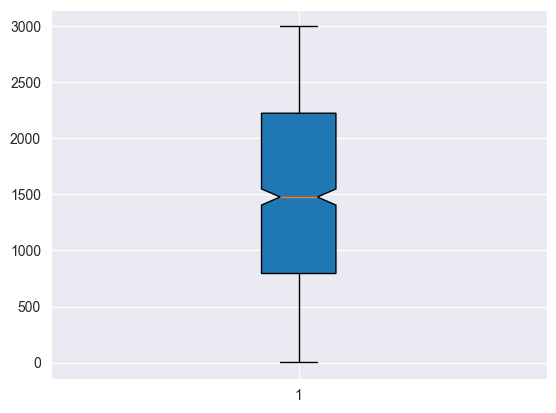

In [44]:
## Boxplot for checking outliers
bp=plt.boxplot(New_visitors_df.visit, patch_artist = True,
                notch ='True', vert = 1)


In [45]:
## getting rid of outliers
new_Visitors_df = New_visitors_df[(New_visitors_df['visit']<=2900) & (New_visitors_df['visit']>=100)]
new_Visitors_df.shape[0]
print("the new size of the data after getting rid of outliers is - {} rows".format(new_Visitors_df.shape[0]))

the new size of the data after getting rid of outliers is - 923 rows


# 3. Insert data into a SQL Lite database – create a table with the following data (Hint: Python for Data Analysis page 191):

a. Name, Address, City, State, Zip, Phone Number

b. Add at least 10 rows of data and submit your code with a query generating your results.

In [46]:
## load the sql library
import sqlite3

In [64]:
# making a connection to sql lite db 

con = sqlite3.connect('./datasets/mydata.sqlite')

#defining DDL query 

query = "CREATE TABLE UserDataTable (Name VARCHAR(50), Address VARCHAR(500),City VARCHAR(50), State VARCHAR(50),PhoneNumber VARCHAR(50),Zip INTEGER);"

#execute the query to create the table 

con.execute(query)
con.commit()



In [65]:
# Add data into table 

data = [('James Butt', '6649 N Blue Gum St', 'New Orleans', 'LA', 70116, '504-621-8927'), ('Josephine Darakjy','4 B Blue Ridge Blvd','Brighton','MI',48116,'810-292-9388'), ('Art Venere','8 W Cerritos Ave␣ , #54','Bridgeport','NJ',8014,'856-636-8749'),  ('Lenna Paprocki','639 Main St','Anchorage','AK',99501,'907-385-4412'), ('Donette Foller','34 Center St','Hamilton','OH',45011,'513-570-1893'), ('Simona Morasca','3 Mcauley Dr','Ashland','OH',44805,'419-503-2484'), ('Mitsue Tollner','7 Eads St','Chicago','IL',60632,'773-573-6914'), ('Leota Dilliard','7 W Jackson Blvd','San␣ , Jose','CA',95111,'408-752-3500'), ('Sage Wieser','5 Boston Ave #88','Sioux ,  Falls','SD',57105,'605-414-2147'), ('Kris Marrier','228 Runamuck Pl , #2808','Baltimore','MD',21224,'410-655-8723')]

stmt = "INSERT INTO UserDataTable VALUES(?, ?, ?, ?, ?, ?)"

con.executemany(stmt, data)

con.commit()

In [66]:
## import the pandas data frame
import pandas as pd

In [67]:
stm='select * from UserDataTable'

In [68]:
cursor = con.execute(stm)
rows = cursor.fetchall()
rows[1]

('Josephine Darakjy',
 '4 B Blue Ridge Blvd',
 'Brighton',
 'MI',
 '48116',
 '810-292-9388')

In [69]:
## sql query for selecting all the columns data
pd.read_sql_query(stm, con)

,Name,Address,City,State,PhoneNumber,Zip
0,James Butt,6649 N Blue Gum St,New Orleans,LA,70116,504-621-8927
1,Josephine Darakjy,4 B Blue Ridge Blvd,Brighton,MI,48116,810-292-9388
2,Art Venere,"8 W Cerritos Ave␣ , #54",Bridgeport,NJ,8014,856-636-8749
3,Lenna Paprocki,639 Main St,Anchorage,AK,99501,907-385-4412
4,Donette Foller,34 Center St,Hamilton,OH,45011,513-570-1893
5,Simona Morasca,3 Mcauley Dr,Ashland,OH,44805,419-503-2484
6,Mitsue Tollner,7 Eads St,Chicago,IL,60632,773-573-6914
7,Leota Dilliard,7 W Jackson Blvd,"San␣ , Jose",CA,95111,408-752-3500
8,Sage Wieser,5 Boston Ave #88,"Sioux , Falls",SD,57105,605-414-2147
9,Kris Marrier,"228 Runamuck Pl , #2808",Baltimore,MD,21224,410-655-8723
